<h1>Desafio 1 - Grupo 5</h1>

<h3><u>Intregrantes del grupo</u></h3>

- Lesertesseur, Diego
- Panizza, Camila  
- Pellecchia, Franco   
- Magariños, Néstor  
- Suarez, Horacio  

<h3><u>Objetivos</u></h3>
La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades
para venta y alquiler. Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de
regresión que permita predecir el precio por metro cuadrado de una propiedad. El objetivo
final es que el modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello
la empresa le provee de un dataset correspondiente al primer semestre de 2017.

- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

<h3><u>Variables</u></h3>

- Fecha de creación
- Tipo de la propiedad (house, apartment, ph)
- Operación del aviso (sell, rent)
- Nombre del lugar
- Nombre del lugar + nombre de sus ‘padres’
- ID de geonames del lugar (si está disponible)
- Latitud,Longitud
- Precio original del aviso
- Moneda original del aviso (ARS, USD)
- Precio del aviso en moneda local (ARS)
- Precio aproximado en USD
- Superficie en m²
- Superficie cubierta en m²
- Precio en USD/m²
- Precio por m²
- N° de piso, si corresponde
- Ambientes
- URL en Properati
- Descripción
- Título
- URL de un thumbnail de la

<h3><u>Índice</u></h3>
<a href='#section_1'>1. Preparación del dataset</a> 

<a href='#section_2'>2. Data wrangling</a>  
<a href='#section_3'>3. Nuevas variables</a>  
<a href='#section_4'>4. Dataset final</a>

---
---
<b><a id='section_1'><h4>1. Preparación del dataset</h4></a></b>
<a href='#section_1_1'>1.1. Importación de librerías y carga del dataset</a>  
<a href='#section_1_2'>1.2. Descripción del dataset</a>  
<a href='#section_1_3'>1.3. Selección de columnas útiles</a>  
<a href='#section_1_4'>1.4. Detección de duplicados</a>

<b><a id='section_1_1'>1.1. Importación de librerías y carga del dataset</a>  </b>

In [447]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [448]:
data= pd.read_csv("../../Data/properati.csv")

---
<b><a id='section_1_2'>1.2. Descripción del dataset</a></b>

In [449]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Unnamed: 0,int64,0.00,0,121220,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
operation,object,0.00,0,1,[sell]
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.00,0,1,[Argentina]
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
geonames_id,float64,0.15,18717,647,"[3430787.0, 3432039.0, 3431333.0, 3435548.0, 3..."
lat-lon,object,0.43,51550,47204,"[-34.6618237,-58.5088387, -34.9038831,-57.9643..."
lat,float64,0.43,51550,46496,"[-34.6618237, -34.9038831, -34.6522615, -34.64..."


---
<b><a id='section_1_3'>1.3. Selección de columnas útiles</a></b>

In [450]:
columnasUtiles=   ['property_type','place_name','state_name', 'place_with_parent_names', 'price', 'currency','price_aprox_local_currency',
                   'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2',
                   'rooms', 'expenses','description','title']
data_describe_utiles = data_describe.loc[columnasUtiles,:]
data_describe_utiles

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


---
<b><a id='section_1_4'>1.4. Deteción de duplicados</a></b>  
Se procede a eliminar las observaciones duplicadas según las variables indicadas en 'columnasDuplicadas'. Se opta por conservar las observaciones que tienen descripción más larga

In [451]:
columnasDuplicadas = ['property_type','place_name','state_name', 'place_with_parent_names',
                      'surface_total_in_m2','surface_covered_in_m2','title']
data[columnasDuplicadas].duplicated().sum()

19066

In [452]:
data['description_len'] = data['description'].apply(lambda x: len(str(x)))
data = data.sort_values(by=['description_len'], ascending= False)

In [453]:
display(data.shape)
data = data.drop_duplicates(subset = columnasDuplicadas, keep= 'first')
display(data.shape)

(121220, 27)

(102154, 27)

In [454]:
data = data.reset_index()

---
---

<b><a id='section_2'><h4>2. Data wrangling</h4></a></b>
<a href='#section_2_1'>2.1. Columna 'property_type'</a>  
<a href='#section_2_2'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a>  
<a href='#section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  
<a href='#section_2_4'>2.4. Columna 'rooms'</a>  
<a href='#section_2_5'>2.5. Columna 'floor'</a>  
<a href='#section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a>  
<a href='#section_2_7'>2.7. Columna 'price_usd_per_m2'</a>  

In [455]:
data['description_lower'] = data['description'].str.lower()
data['title_lower'] = data['title'].str.lower()

<b><a id='section_2_1'>2.1. Columna 'property_type'</a></b>

Análisis de valores y nulos

In [456]:
data_describe.loc[data_describe.index.isin(['property_type']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.0,0,4,"[PH, apartment, house, store]"


Visualización

,property_type
apartment,54.0
house,37.0
PH,5.2
store,3.9


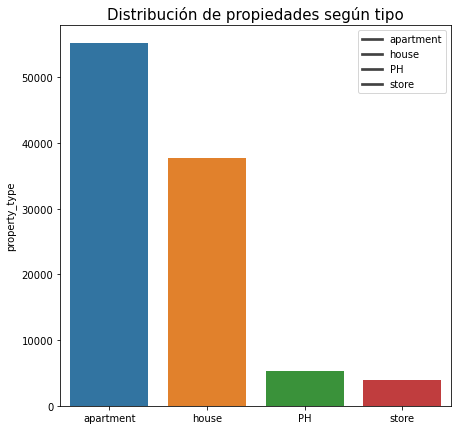

In [457]:
f, ax = plt.subplots()
f.set_figwidth(7)
f.set_figheight(7)
sns.barplot(y=data['property_type'].value_counts(),x=data['property_type'].value_counts().index)
plt.title("Distribución de propiedades según tipo",fontsize=15)
plt.legend(labels=data['property_type'].value_counts().index)
pd.DataFrame(round((data['property_type'].value_counts()/data.shape[0])*100,1))

---
<b><a id='section_2_2'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a></b>

Análisis de valores y nulos

In [458]:
data_describe.loc[data_describe.index.isin(['country_name', 'state_name', 'place_name','place_with_parent_names']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
place_name,object,0.0,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.0,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.0,0,1,[Argentina]
state_name,object,0.0,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."


Dividimos la columna 'place_with_parent_names' y analizamos su contenido.

In [459]:
data['place_with_parent_names_clean'] = data['place_with_parent_names']

total_place = data['place_with_parent_names_clean'].apply(lambda row: len(row.split('|'))-2)
dic_ret = dict()
for i in range(total_place.max()):
    dic_ret['place_'+ str(i)] = ([None] * total_place.shape[0])

In [460]:
for row in data['place_with_parent_names_clean'].index:
    i=0;
    list_places = data['place_with_parent_names_clean'].loc[row].split('|')
    for x in list_places:
        if len(x)>0:
            colname='place_' + str(i)
            dic_ret[colname][row] = x
            i+=1

In [461]:
new_columns = pd.DataFrame(dic_ret)
data = data.join(new_columns)

In [462]:
data[['country_name','state_name','place_name','place_0','place_1','place_2','place_3','place_4']].sample(10)

,country_name,state_name,place_name,place_0,place_1,place_2,place_3,place_4
50998,Argentina,Capital Federal,Barrio Norte,Argentina,Capital Federal,Barrio Norte,None,None
97900,Argentina,Capital Federal,Nuñez,Argentina,Capital Federal,Nuñez,None,None
8650,Argentina,Buenos Aires Costa Atlántica,Pinamar,Argentina,Buenos Aires Costa Atlántica,Pinamar,None,None
59111,Argentina,Capital Federal,Las Cañitas,Argentina,Capital Federal,Las Cañitas,None,None
95511,Argentina,Santa Fe,Rosario,Argentina,Santa Fe,Rosario,None,None
96355,Argentina,La Pampa,Santa Rosa,Argentina,La Pampa,Santa Rosa,None,None
70088,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,None
90718,Argentina,Córdoba,Oncativo,Argentina,Córdoba,Oncativo,None,None
92544,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None
2412,Argentina,Capital Federal,Belgrano,Argentina,Capital Federal,Belgrano,None,None


La columna place_with_parent_names contiene la misma información que las columnas 'country_name', 'state_name' y 'place_name' e incluye información adicional.  
Se opta por utilizar la información proveniente de 'place_with_parent_name' y <u>se generan las variables 'provincia','ciudad','departamento' y'barrio'</u>

In [463]:
data[['provincia','ciudad','departamento','barrio']] = data[['place_1','place_2','place_3','place_4']]

Visualización

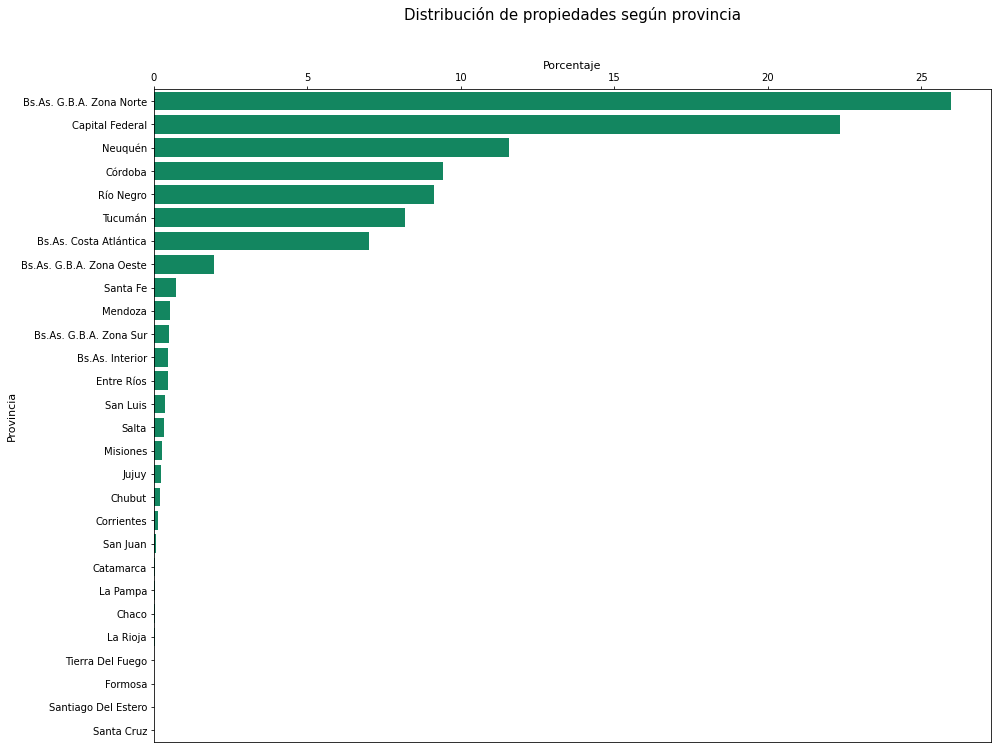

In [464]:
patternBsAs = re.compile("Buenos Aires\s*")
data['provincia'] = data['provincia'].apply(lambda x: patternBsAs.sub('Bs.As. ', x))

f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(12)
sns.barplot((data['provincia'].value_counts()/data['provincia'].shape[0])*100,data['provincia'].unique(), ax=ax , color = "#009966", orient="h")
plt.title("Distribución de propiedades según provincia\n\n",fontsize=15)
plt.xlabel("Porcentaje",fontsize=11)
ax.xaxis.set_label_position('top') 
plt.ylabel("Provincia",fontsize=11)
ax.xaxis.tick_top()

---
<b><a id='section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  </b>

Análisis de valores y nulos

In [465]:
data_describe.loc[data_describe.index.isin(['price','currency','price_aprox_local_currency','price_aprox_usd']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."


In [466]:
maskNull_priceAndCurrency = data['price'].isnull() & data['currency'].isnull() &\
                            data['price_aprox_local_currency'].isnull() &\
                            data['price_aprox_usd'].isnull()

print("Cantidad de nulos que coinciden:",maskNull_priceAndCurrency.value_counts()[True],"de 20411")

Cantidad de nulos que coinciden: 15296 de 20411


In [467]:
data.loc[data['currency'].isnull() & data['price'].notnull() ,['price','currency','price_aprox_local_currency','price_aprox_usd']]

,price,currency,price_aprox_local_currency,price_aprox_usd
101219,0.0,NaN,0.0,0.0


Detectamos que <u>los nulos de las columnas  'price','currency','price_aprox_local_currency' y 'price_aprox_usd' coinciden</u>  
Existe un solo nulo adicional en la columna 'currency' en el cual el resto toma valor 0. Se decide reemplazar esos 0 por NaN

In [468]:
data[['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]=data[['price','price_aprox_local_currency','price_aprox_usd']]

In [469]:
data.loc[data['currency'].isnull(),['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']] = np.NaN
data.loc[9761,['price_clean', 'currency', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]

price_clean                              185000
currency                                    USD
price_aprox_local_currency_clean    3.26423e+06
price_aprox_usd_clean                    185000
Name: 9761, dtype: object

Para la propiedades que tienen 'price' expresado en USD, imputamos estos valores en la columna 'price_aprox_usd_clean'

In [470]:
maskUSD = data['currency'] == "USD"
data.loc[maskUSD, 'price_aprox_usd_clean'] = data.loc[maskUSD, 'price']

Visualización

Text(0, 0.5, 'Porcentaje')

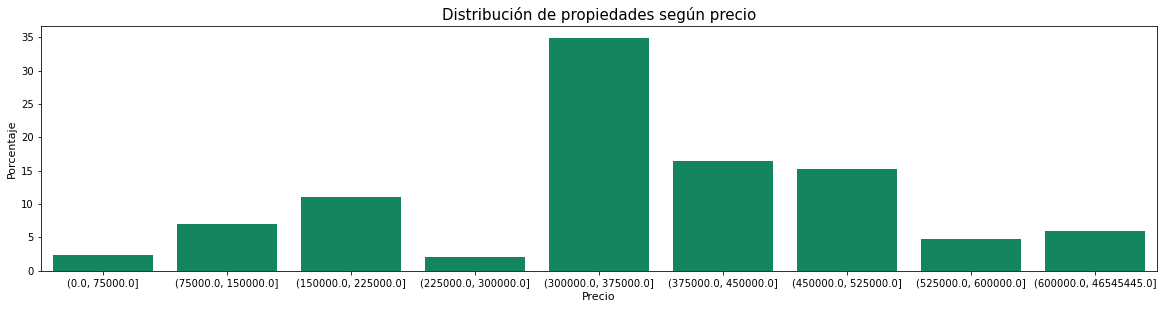

In [471]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, 525000, 600000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Análisis de outliers.   
  
Debido a que pueden existir significativas diferencias de valor entre las propiedades según el tipo de propiedad y la ciudad donde se ubican, se calculan valores límites para determinar outliers a partir de estas variables. Esta consideración es tenida en cuenta en todos los procesos de "Análisis de outliers"

In [472]:
data['outliers_Price'] = None
data['ciudad_sinNulos'] = data['ciudad'].fillna("-")
data['auxiliar_Outliers'] = data['property_type']+data['provincia']+data['ciudad_sinNulos']
for i in data['auxiliar_Outliers'].unique():
    rangoInterquartil_price= data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.75) - data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.25)
    umbral_lower_Price = data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.25) - rangoInterquartil_price*1.5
    umbral_upper_Price = data.loc[data['auxiliar_Outliers']==i,'price_aprox_usd_clean'].quantile(0.75) + rangoInterquartil_price*1.5


    data.loc[maskNotNull_price & (data['auxiliar_Outliers']==i), 'outliers_Price']= data.loc[maskNotNull_price & (data['auxiliar_Outliers']==i), 'price_aprox_usd_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_Price else(
                                                                                 "Outlier inferior" if x<umbral_lower_Price else 
                                                                                 "No es outlier"))

outliers_Price = data['outliers_Price']
data = data.drop(columns = ['outliers_Price','ciudad_sinNulos'])
pd.DataFrame(round((outliers_Price.value_counts() / outliers_Price[maskNotNull_price].shape[0])*100,1))

,outliers_Price
No es outlier,93.3
Outlier superior,6.7
Outlier inferior,0.0


Se reemplaza a los outliers por nulos

In [473]:
maskOutliers= outliers_Price !="No es outlier"
data.loc[maskOutliers,'price_aprox_usd_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Porcentaje')

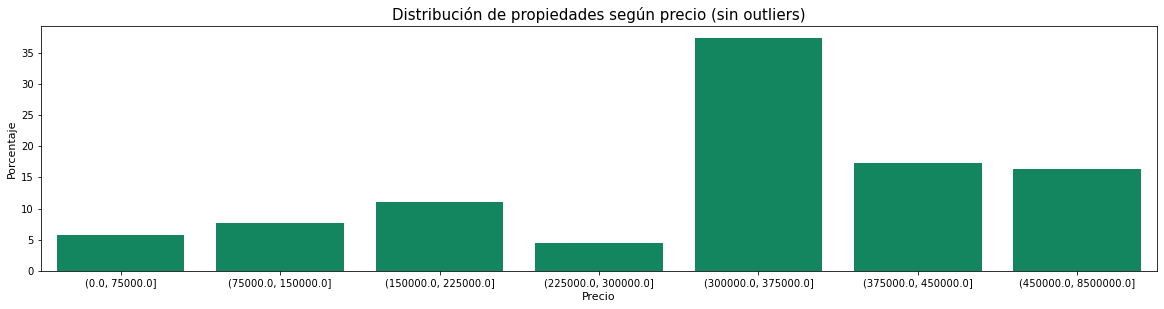

In [474]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio (sin outliers)",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Text(0, 0.5, 'Precio')

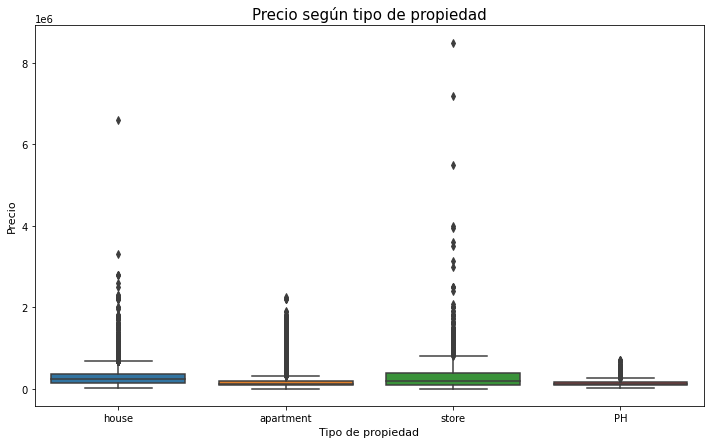

In [475]:
maskNotNull_Rooms = data['price_aprox_usd_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'price_aprox_usd_clean'])
plt.title("Precio según tipo de propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio",fontsize=11)

---
<b><a id='section_2_4'>2.4. Columna 'rooms'</a>  </b>

In [476]:
data['rooms_clean'] = data['rooms']

Análisis de nulos y valores

In [477]:
data_describe.loc[data_describe.index.isin(['rooms']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
rooms,float64,0.61,73830,32,"[nan, 1.0, 4.0, 3.0, 2.0, 6.0, 5.0, 10.0, 7.0,..."


Completamos los nulos de la columna 'rooms' con datos extraidos de la columna 'descripcion' y 'title'

In [478]:
#Primer pattern
regexAmbientes = re.compile('(?P<numero>\d{1})\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))

In [479]:
#Segundo pattern
regexAmbientes2 = re.compile('(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(amb)')

#Definimos una función para transformar el match obtenido en el search en un número
def MatchToNumber(x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'un': 1, 'uno':1,'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8, 'nueve': 9}
    resultado = dictAmbientes[numeroStr]
    return resultado

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

In [480]:
#Tercer pattern
regexAmbientes3 = re.compile('(?P<numero>\d{1})\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)


In [481]:
#Cuarto pattern
regexAmbientes4 = re.compile('(?P<numeroPalabra>un|1|mono)\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

In [482]:
#Quinto pattern
regexAmbientes5 = re.compile('(?P<numeroPalabra>un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

In [483]:
print("Columna 'rooms'")
print("Cantidad de nulos antes del regex:", data['rooms'].isnull().sum(), "("+str(round((data['rooms'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['rooms_clean'].isnull().sum(),"("+str(round((data['rooms_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'rooms'
Cantidad de nulos antes del regex: 59344 (58.1%)
Cantidad de nulos después del regex: 11189 (11.0%)


Visualización

Text(0, 0.5, 'Cuartos')

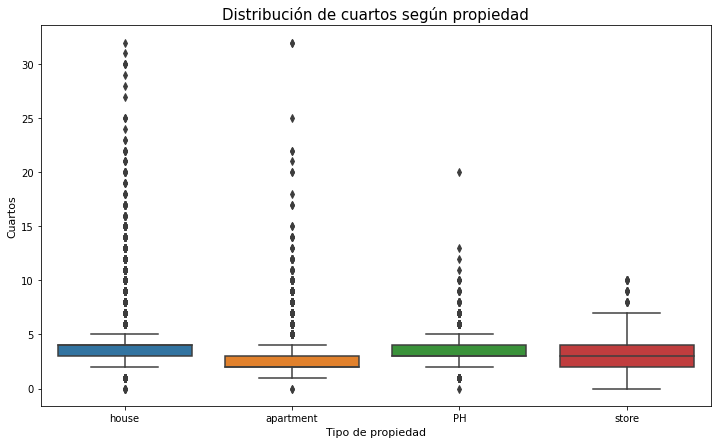

In [484]:
maskNotNull_Rooms = data['rooms_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'rooms_clean'])
plt.title("Distribución de cuartos según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

Análisis de outliers

In [485]:
data['outliers_rooms'] = None
for i in data['property_type'].unique():
    rangoInterquartil_rooms= data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) - data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25)
    umbral_lower_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25) - rangoInterquartil_rooms*1.5
    umbral_upper_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) + rangoInterquartil_rooms*1.5


    data.loc[maskNotNull_Rooms & (data['property_type']==i), 'outliers_rooms']= data.loc[maskNotNull_Rooms & (data['property_type']==i), 'rooms_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_rooms else(
                                                                                 "Outlier inferior" if x<umbral_lower_rooms else 
                                                                                 "No es outlier"))

outliers_rooms = data['outliers_rooms']
data = data.drop(columns = ['outliers_rooms'])
pd.DataFrame(round((outliers_rooms.value_counts() / outliers_rooms[maskNotNull_Rooms].shape[0])*100,1))

,outliers_rooms
No es outlier,93.4
Outlier superior,6.0
Outlier inferior,0.6


Se reemplaza a los outliers por nulos

In [486]:
maskOutliers= outliers_rooms !="No es outlier"
data.loc[maskOutliers,'rooms_clean'] = np.NaN

Le imputamos a los datos que los nulos el valor promedio de cuartos según su tipo de propiedad.
Los nulos proveniente de los outliers quedan nulos

In [487]:
maskOldNulls = maskNotNull_Rooms ==False 

In [488]:
meanByProperty_rooms = pd.DataFrame(data.groupby('property_type')['rooms_clean'].mean())
meanByProperty_rooms.columns = ['rooms_clean_mean']
meanByProperty_rooms['rooms_clean_mean'] = meanByProperty_rooms['rooms_clean_mean'].apply(lambda x: math.floor(x))
meanByProperty_rooms.sort_values(by = 'rooms_clean_mean', ascending=False)

,rooms_clean_mean
property_type,
PH,3
house,3
apartment,2
store,2


In [489]:
data= data.merge(meanByProperty_rooms, on='property_type')

In [490]:
data.loc[maskOldNulls,'rooms_clean'] = data.loc[maskOldNulls,'rooms_clean_mean'] 
data = data.drop(columns=['rooms_clean_mean'])

Visualización sin outliers

Text(0, 0.5, 'Cuartos')

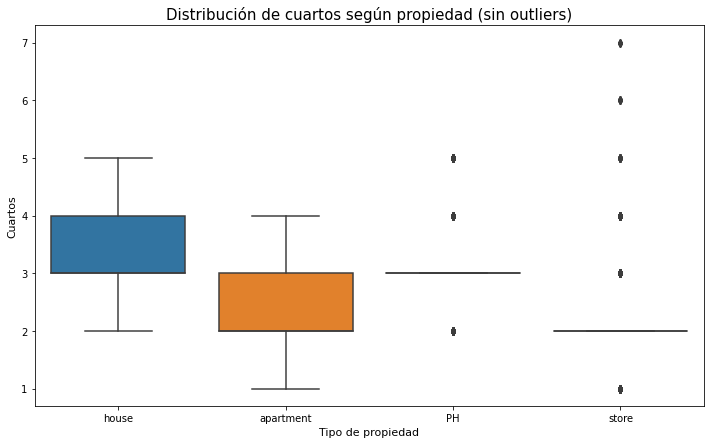

In [491]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data['property_type'],y=data['rooms_clean'])
plt.title("Distribución de cuartos según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

---
<b><a id='section_2_5'>2.5. Columna 'floor'</a> </b>

In [492]:
data['floor_clean'] = data['floor']

Análisis de nulos y valores

In [493]:
data_describe.loc[data_describe.index.isin(['floor']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
floor,float64,0.93,113321,183,"[nan, 5.0, 1.0, 2.0, 3.0, 12.0, 6.0, 4.0, 7.0,..."


In [494]:
print("Campos con información en la columna 'floor' según tipo de propiedad")
pd.DataFrame(data.groupby('property_type')['floor'].apply(lambda x: x.notnull().sum()))

Campos con información en la columna 'floor' según tipo de propiedad


,floor
property_type,
PH,385
apartment,5589
house,624
store,39


Se decide contemplar la variable 'floor' únicamente para los departamentos. Se le imputa valor nulo a los otros tipo de propiedad

In [495]:
maskNotApartment = data['property_type'] != 'apartment'
data.loc[maskNotApartment, 'floor_clean'] = np.NaN
pd.DataFrame(data.groupby('property_type')['floor_clean'].apply(lambda x: x.notnull().sum()))

,floor_clean
property_type,
PH,0
apartment,5589
house,0
store,0


Completamos los nulos de la columna 'floor_clean' con datos extraidos de la columna 'descripcion' y 'title'

In [496]:
maskApartment = data['property_type'] == 'apartment'

In [497]:
#Primer pattern
regexFloor = re.compile('(?P<numeroPiso>\d\d?)\s?(^er|er|do|to|mo|ro|avo|vo|no)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [498]:
#Segundo pattern
regexFloor2 = re.compile('(?P<numeroPiso>\d\d?)\s?\º?\s?(piso)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [499]:
#Tercer pattern
regexFloor3 = re.compile('(piso)\s?(?P<numeroPiso>\d\d?)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [500]:
#Cuarto pattern
regexFloor3 = re.compile('pb|plantabaja|planta baja')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

In [501]:
data['floor_clean'] = data['floor_clean'].astype(float)

In [502]:
print("Columna 'floor'")
print("Cantidad de nulos antes del regex:", data.loc[maskApartment,'floor'].isnull().sum(), "("+str(round((data.loc[maskApartment,'floor'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data.loc[maskApartment,'floor_clean'].isnull().sum(),"("+str(round((data.loc[maskApartment,'floor_clean'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")

Columna 'floor'
Cantidad de nulos antes del regex: 49541 (89.9%)
Cantidad de nulos después del regex: 23149 (42.0%)


Visualización

Text(0, 0.5, 'Pisos')

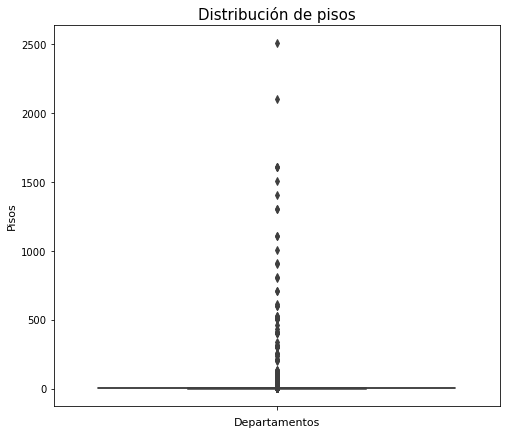

In [503]:
maskNotNull_Floor = data['floor_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data.loc[maskNotNull_Floor,'floor_clean'])
plt.title("Distribución de pisos",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

Análisis de outliers. Se consideran nulos a los pisos superiores a 20.

In [504]:
maskOutliers = data['floor_clean'] > 20
maskOutliers.value_counts()

False    100946
True       1208
Name: floor_clean, dtype: int64

Se reemplaza los outliers por nulos

In [505]:
maskOutliers = data['floor_clean'] > 20
data.loc[maskOutliers,'floor_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Pisos')

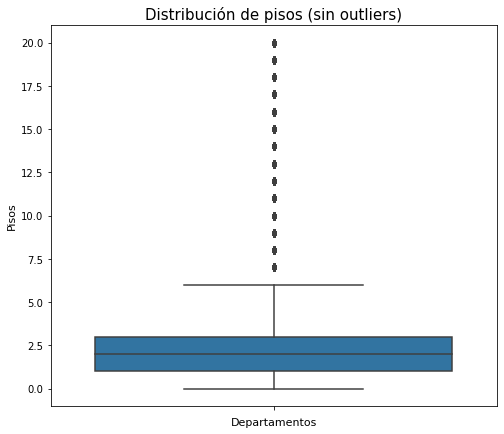

In [506]:
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data['floor_clean'])
plt.title("Distribución de pisos (sin outliers)",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

---
<b><a id='section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a> </b>

In [507]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2']

Análisis de nulos y valores

In [508]:
data_describe.loc[data_describe.index.isin(['surface_covered_in_m2','surface_total_in_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


In [509]:
maskNull_coveredAndTotal = data['surface_covered_in_m2'].isnull() & data['surface_total_in_m2'].isnull()
print("Cantidad de nulos que coinciden:",maskNull_coveredAndTotal.value_counts()[True])

Cantidad de nulos que coinciden: 9521


Se opta por completar la columna 'surface_total_in_m2' mediante el siguiente proceso:  
1- Imputar datos de acuerdo a la proporción media entre  'surface_covered_in_m2'  y 'surface_total_in_m2'  
2- Completamos los nulos restantes con datos extraidos de la columna 'descripcion' y 'title'

In [510]:
maskNotNull_TotalAndCovered = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].notnull()
data['covered_pct'] = data.loc[maskNotNull_TotalAndCovered, 'surface_covered_in_m2'] / data.loc[maskNotNull_TotalAndCovered, 'surface_total_in_m2'] 
data['covered_pct'] = data['covered_pct'].apply(lambda x: 1 if x>1 else x)
meanByProperty = pd.DataFrame(data.groupby('property_type')['covered_pct'].mean())
meanByProperty.columns = ['covered_pct_mean']
print("Las casas son las que menos metros cuadrados tienen cubierto")
meanByProperty.sort_values(by = 'covered_pct_mean', ascending=False)

Las casas son las que menos metros cuadrados tienen cubierto


,covered_pct_mean
property_type,
store,0.938959
apartment,0.887247
PH,0.808392
house,0.691308


In [511]:
data = data.merge(meanByProperty, on='property_type')

In [512]:
maskFill = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].isnull()
surface_total_parche = data.loc[maskFill,'surface_covered_in_m2'] / data.loc[maskFill,'covered_pct_mean']
data.loc[maskFill, 'surface_total_in_m2_clean'] = surface_total_parche[maskFill] 

In [513]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes de la imputación:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después de la imputación:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes de la imputación: 33439 (32.7%)
Cantidad de nulos después de la imputación: 9521 (9.3%)


In [514]:
#Pattern
regexSurface = re.compile('(?P<mts2>\d\d?\d?\d?)\s?(?P<metros>mts|mt|metros|mt2|m2|m|mts2|m2c|mÂ²|mts²)')

#Regex en la columna 'descripcion'
MatchsSurface = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

#Regex en la columna 'title'
MatchsSurface = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

Se considera que una propiedad no puede tener menos de 20 mts cuadrados

In [515]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2_clean'].apply(lambda x: np.NaN if x < 20 else x)

In [516]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes del regex:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes del regex: 33439 (32.7%)
Cantidad de nulos después del regex: 7298 (7.1%)


Visualización

Text(0, 0.5, 'Metros cuadrados')

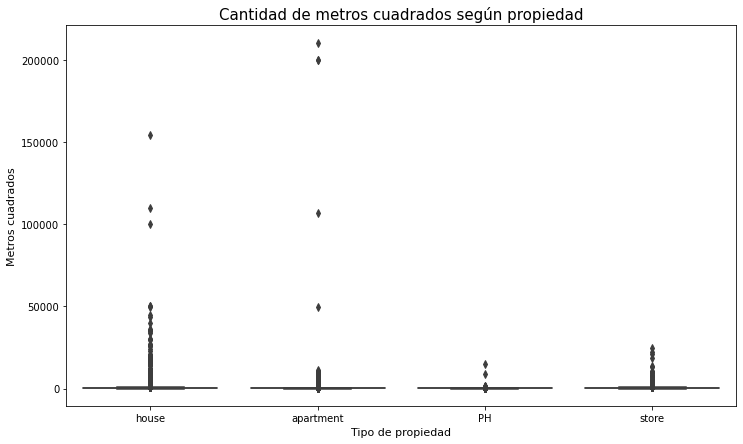

In [517]:
maskNotNull_Surface = data['surface_total_in_m2_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

Análisis de outliers.  

In [518]:
data['outliers_Surface'] = None
for i in data['property_type'].unique():
    rangoInterquartil_Surface= data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25)
    umbral_lower_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25) - rangoInterquartil_Surface*1.5
    umbral_upper_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) + rangoInterquartil_Surface*1.5


    data.loc[maskNotNull_Surface & (data['property_type']==i), 'outliers_Surface']= data.loc[maskNotNull_Surface & (data['property_type']==i), 'surface_total_in_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_Surface else(
                                                                                 "Outlier inferior" if x<umbral_lower_Surface else 
                                                                                 "No es outlier"))

outliers_Surface = data['outliers_Surface']
data = data.drop(columns = ['outliers_Surface'])
pd.DataFrame(round((outliers_Surface.value_counts() / outliers_Surface[maskNotNull_Surface].shape[0])*100,1))

,outliers_Surface
No es outlier,91.9
Outlier superior,8.1


Se reemplaza a los outliers por nulos

In [519]:
maskOutliers= outliers_Surface !="No es outlier"
data.loc[maskOutliers,'surface_total_in_m2_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Metros cuadrados')

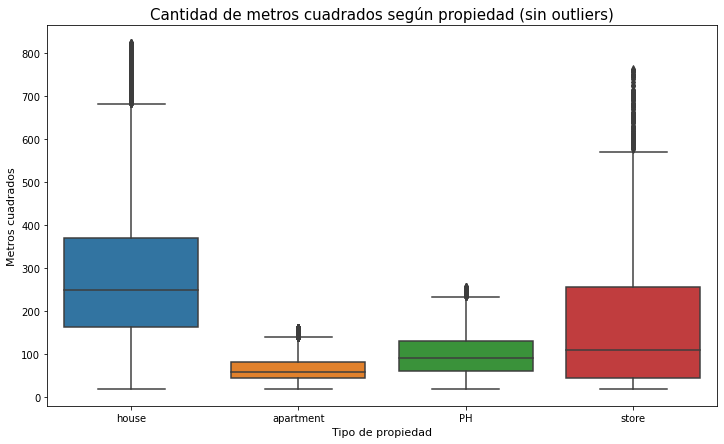

In [520]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)

sns.boxplot(x=data['property_type'],y=data['surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

---
<b><a id='section_2_7'>2.7. Columna 'price_usd_per_m2'</a> </b>

Análisis de nulos y valores

In [521]:
data_describe.loc[data_describe.index.isin(['price_usd_per_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price_usd_per_m2,float64,0.43,52603,25568,"[1127.2727272727273, nan, 1309.090909090909, 1..."


Se reemplaza la columna 'price_usd_per_m2' por el cociente de las columnas 'price_aprox_usd_clean' y 'surface_total_in_m2_clean' para que sea consistente con los cambios realizados

In [522]:
maskNotNull = data['price_aprox_usd_clean'].notnull() & data['surface_total_in_m2_clean'].notnull()
data['price_usd_per_m2_clean'] = (data.loc[maskNotNull, 'price_aprox_usd_clean'] / data.loc[maskNotNull, 'surface_total_in_m2_clean']).round(0)

Visualización

Text(0, 0.5, 'Precio por metro cuadrado')

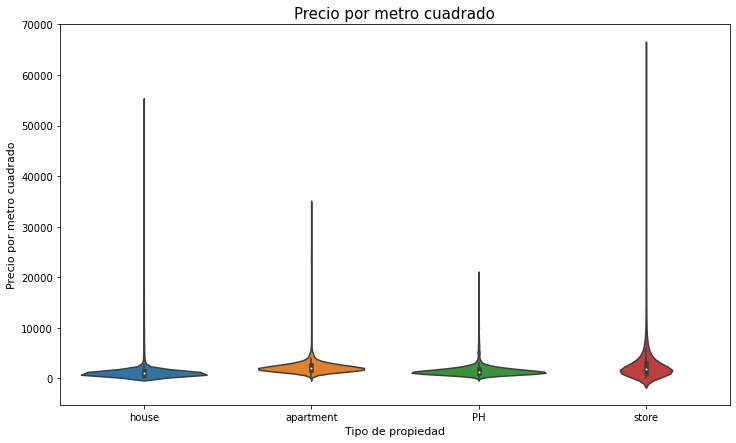

In [523]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

Análisis de outliers

In [524]:
maskNotNull_pricexmt2 = data['price_usd_per_m2_clean'].notnull()
data['outliers_pricexmt2'] = None
for i in data['property_type'].unique():
    rangoInterquartil_pricexmt2= data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25)
    umbral_lower_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25) - rangoInterquartil_pricexmt2*1.5
    umbral_upper_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) + rangoInterquartil_pricexmt2*1.5


    data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'outliers_pricexmt2']= data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'price_usd_per_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_pricexmt2 else(
                                                                                 "Outlier inferior" if x<umbral_lower_pricexmt2 else 
                                                                                 "No es outlier"))

outliers_pricexmt2 = data['outliers_pricexmt2']
data = data.drop(columns = ['outliers_pricexmt2'])
pd.DataFrame(round((outliers_pricexmt2.value_counts() / outliers_pricexmt2[maskNotNull_pricexmt2].shape[0])*100,1))

,outliers_pricexmt2
No es outlier,95.3
Outlier superior,4.7
Outlier inferior,0.0


Se reemplaza a los outliers por nulos

In [525]:
maskOutliers= outliers_pricexmt2 !="No es outlier"
data.loc[maskOutliers,'price_usd_per_m2_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Precio por metro cuadrado')

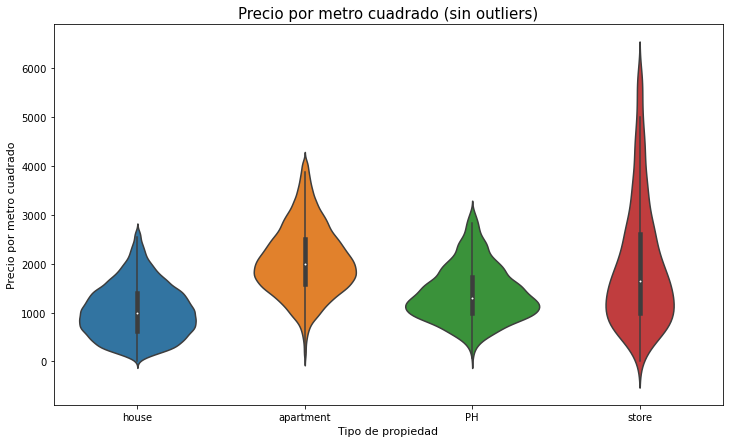

In [526]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

---
---

<b><a id='section_3'><h4>3. Nuevas variables</h4></a></b>
<a href='#section_3_1'>3.1. Pileta</a>  
<a href='#section_3_2'>3.2. Cochera  </a>  
<a href='#section_3_3'>3.3. Barrio cerrado</a>  
<a href='#section_3_4'>3.4. Jacuzzi  </a>  
<a href='#section_3_5'>3.5. Terraza  </a>  
<a href='#section_3_6'>3.6. Quincho  </a>  
<a href='#section_3_67'>3.7. Gimnasio  </a>  

Definimos una función para graficar los patrones encontrados

In [527]:
data['decil'] = pd.qcut(data['price_aprox_usd_clean'],10,labels=[1,2,3,4,5,6,7,8,9,10])
def chart_type(y_value):
    chart_pattern = pd.DataFrame(data[y_value].value_counts())
    chart_pattern[y_value+" (%)"] = round(pd.DataFrame(data[y_value].value_counts())/data[y_value].shape[0]*100,2)
    
    chart_property = (data.groupby('property_type')[y_value].sum()/data.groupby('property_type')[y_value].count())*100
    chart_property = pd.DataFrame(round(chart_property,2))
    chart_property =chart_property.reset_index()
    
    chart_decil = (data.groupby('decil')[y_value].sum()/data.groupby('decil')[y_value].count())*100
    chart_decil = pd.DataFrame(round(chart_decil,2))
    chart_decil =chart_decil.reset_index()
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figwidth(12)
    f.set_figheight(4.5)
    
    ax1.pie(chart_pattern[y_value],labels=chart_pattern.index, autopct='%1.1f%%', shadow=True)  
    sns.barplot(x='property_type', y=y_value, data=chart_property, ax=ax2)
    sns.barplot(x='decil', y=y_value, data=chart_decil, color = "#009966", ax=ax3)
    
    plt.tight_layout()
    ax1.title.set_text("Patrones de \'"+y_value+"\' encontrados")
    ax2.title.set_text("Porcentaje de "+y_value+" por tipo de propiedad")
    ax3.title.set_text("Porcentaje de "+y_value+" según decil\ndel valor de la propiedad")
    return

---
<b><a id='section_3_1'>3.1. Pileta</a>  </b>

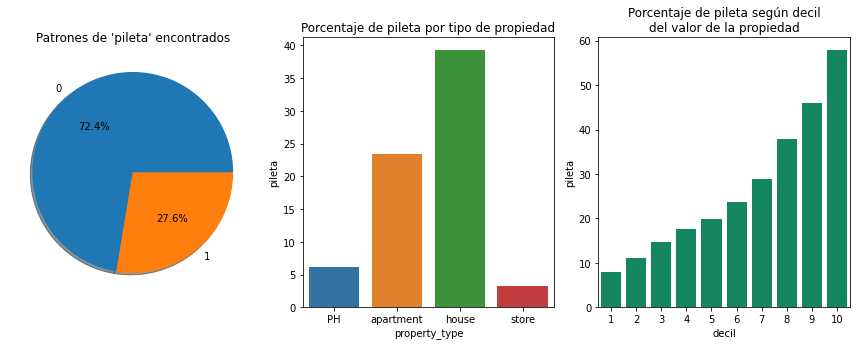

In [528]:
#Pattern
regexPileta = re.compile("(?P<pileta>pileta|picina|piscina|pisina)")

data['pileta'] = 0
#Regex en la columna 'descripcion'
MatchsPileta = data['description_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

#Regex en la columna 'title'
MatchsPileta = data['title_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

chart_type('pileta')

---
<b><a id='section_3_2'>3.2. Cochera</a>  </b>

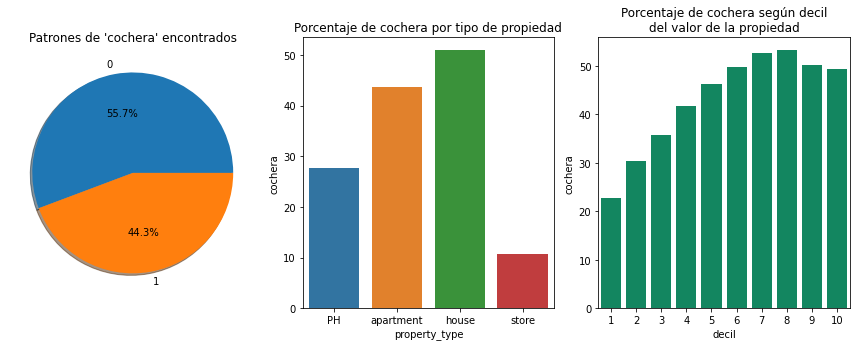

In [529]:
#Pattern
regexCochera = re.compile("(?P<cochera>cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)")

data['cochera'] = 0
#Regex en la columna 'descripcion'
MatchsCochera = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

#Regex en la columna 'title'
MatchsCochera = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

chart_type('cochera')

---
<b><a id='section_3_3'>3.3. Barrio cerrado</a>  </b>

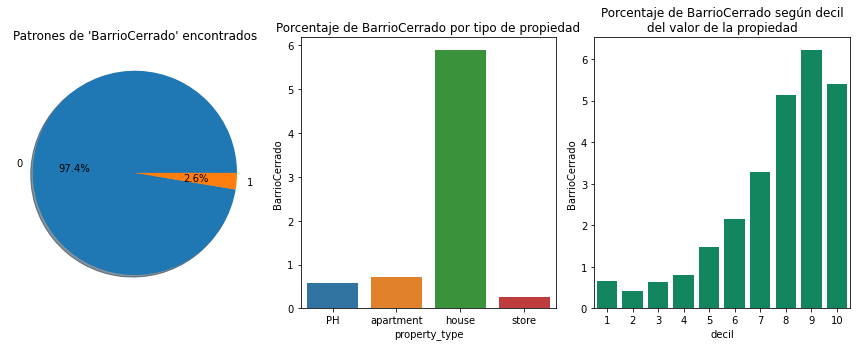

In [530]:
#Pattern
regexBarrioCerrado = re.compile("(?P<barrio>(barrio cerrado)|(barrio semicerrado)|(barrio semi cerrado)|country)")

data['BarrioCerrado'] = 0
#Regex en la columna 'descripcion'
MatchsBarrioCerrado = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

#Regex en la columna 'title'
MatchsBarrioCerrado = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

chart_type('BarrioCerrado')

---
<b><a id='section_3_4'>3.4. Jacuzzi</a>  </b>

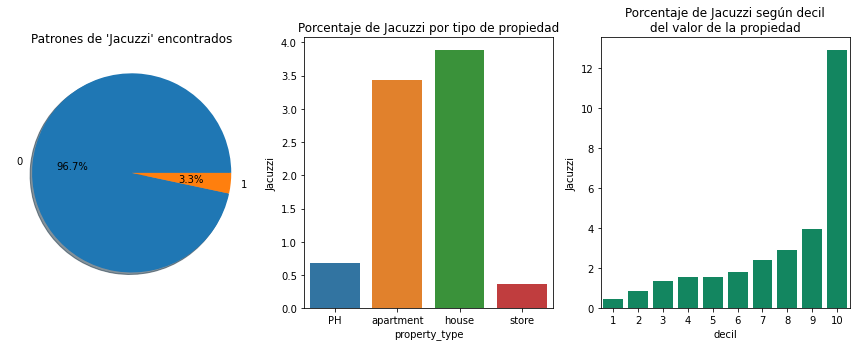

In [531]:
#Pattern
regexJacuzzi = re.compile("(?P<jacuzzi>(jacuzzi)|(suana)|(jacuzi))")

data['Jacuzzi'] = 0
#Regex en la columna 'descripcion'
MatchsJacuzzi = data['description_lower'].apply(lambda x: x if x is np.NaN else regexJacuzzi.search(x))
maskJacuzzi_Match = MatchsJacuzzi.notnull()
data.loc[maskJacuzzi_Match, 'Jacuzzi'] = 1

#Regex en la columna 'title'
MatchsJacuzzi = data['title_lower'].apply(lambda x: x if x is np.NaN else regexJacuzzi.search(x))
maskJacuzzi_Match = MatchsJacuzzi.notnull()
data.loc[maskJacuzzi_Match, 'Jacuzzi'] = 1

chart_type('Jacuzzi')

---
<b><a id='section_3_5'>3.5. Terraza</a>  </b>

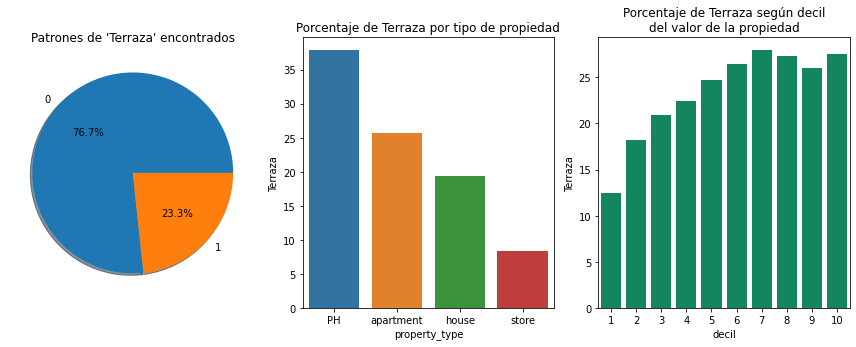

In [532]:
#Pattern
regexTerraza = re.compile("(?P<terraza>(terraza)|(terrasa)|(azotea)|(asotea))")

data['Terraza'] = 0
#Regex en la columna 'descripcion'
MatchsTerraza = data['description_lower'].apply(lambda x: x if x is np.NaN else regexTerraza.search(x))
maskTerraza_Match = MatchsTerraza.notnull()
data.loc[maskTerraza_Match, 'Terraza'] = 1

#Regex en la columna 'title'
MatchsTerraza = data['title_lower'].apply(lambda x: x if x is np.NaN else regexTerraza.search(x))
maskTerraza_Match = MatchsTerraza.notnull()
data.loc[maskTerraza_Match, 'Terraza'] = 1

chart_type('Terraza')

---
<b><a id='section_3_6'>3.6. Quincho</a>  </b>

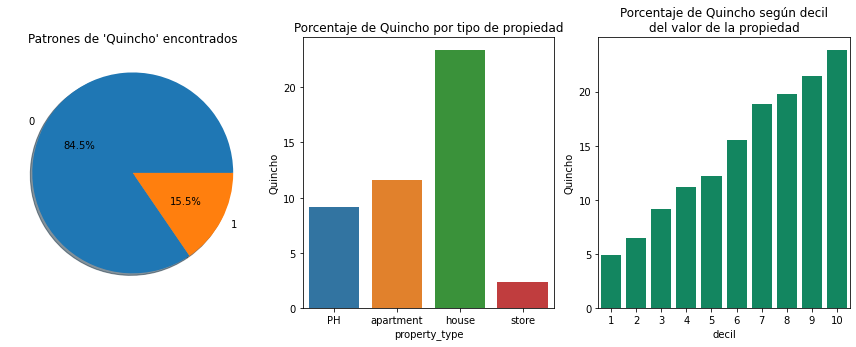

In [533]:
#Pattern
regexQuincho = re.compile("(?P<quincho>(quincho)|(kincho)|(qincho)|(\ssum\s)|(s\.u\.m\.))")

data['Quincho'] = 0
#Regex en la columna 'descripcion'
MatchsQuincho = data['description_lower'].apply(lambda x: x if x is np.NaN else regexQuincho.search(x))
maskQuincho_Match = MatchsQuincho.notnull()
data.loc[maskQuincho_Match, 'Quincho'] = 1

#Regex en la columna 'title'
MatchsQuincho = data['title_lower'].apply(lambda x: x if x is np.NaN else regexQuincho.search(x))
maskQuincho_Match = MatchsQuincho.notnull()
data.loc[maskQuincho_Match, 'Quincho'] = 1

chart_type('Quincho')

---
<b><a id='section_3_7'>3.7. Gimnasio</a>  </b>

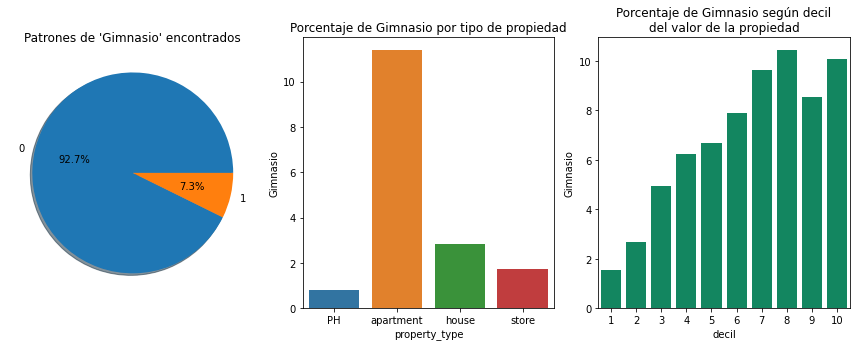

In [534]:
#Pattern
regexGimnasio = re.compile("(?P<gym>(gym)|(gimnasio)|(gimnacio))")

data['Gimnasio'] = 0
#Regex en la columna 'descripcion'
MatchsGimnasio = data['description_lower'].apply(lambda x: x if x is np.NaN else regexGimnasio.search(x))
maskGimnasio_Match = MatchsGimnasio.notnull()
data.loc[maskGimnasio_Match, 'Gimnasio'] = 1

#Regex en la columna 'title'
MatchsGimnasio = data['title_lower'].apply(lambda x: x if x is np.NaN else regexGimnasio.search(x))
maskGimnasio_Match = MatchsGimnasio.notnull()
data.loc[maskGimnasio_Match, 'Gimnasio'] = 1

chart_type('Gimnasio')

---
<b><a id='section_3_9'>3.9. Seguridad</a>  </b>

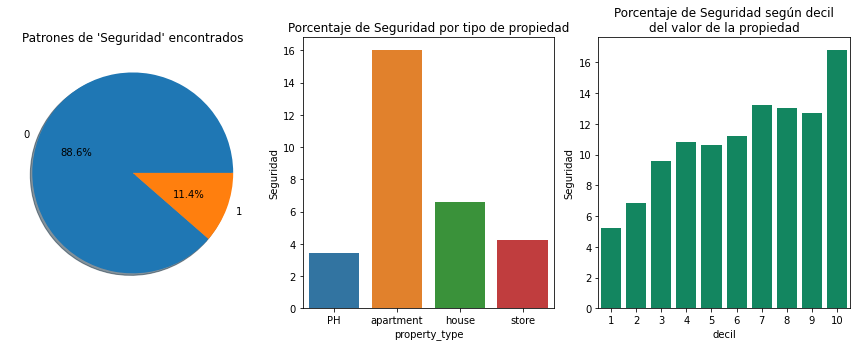

In [535]:
#Pattern
regexSeguridad = re.compile("(?P<seguridad>seguridad|vigilancia|c[a|á]maras|ojo de halc[o|ó]n|vigilador|garita|circuito cerrado|cctv|monitoreo|seg 24|24hr)+")

data['Seguridad'] = 0
#Regex en la columna 'descripcion'
MatchsSeguridad = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

#Regex en la columna 'title'
MatchsSeguridad = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

chart_type('Seguridad')

---
<b><a id='section_3_10'>3.10. A Reciclar</a>  </b>

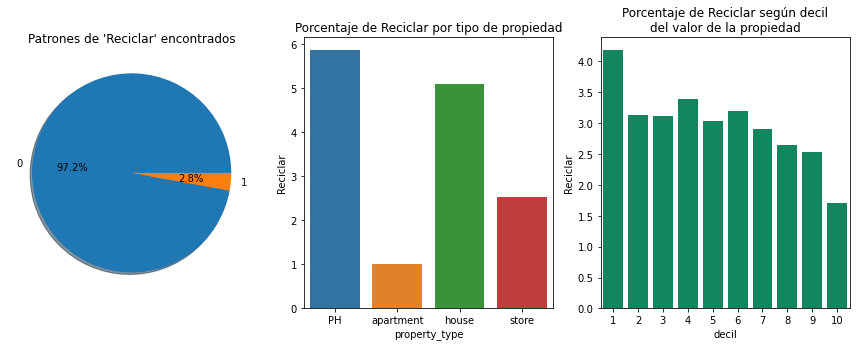

In [536]:
#Pattern
regexReciclar = re.compile("(?P<reciclar>reciclar|refaccionar|acondicionar|a terminar|para terminar)+")

data['Reciclar'] = 0
#Regex en la columna 'descripcion'
MatchsReciclar = data['description_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

#Regex en la columna 'title'
MatchsReciclar = data['title_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

chart_type('Reciclar')

---
<b><a id='section_3_11'>3.11. De Epoca</a>  </b>

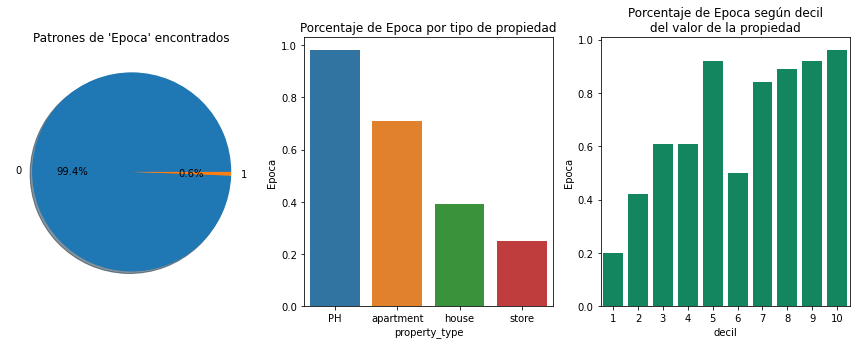

In [537]:
#Pattern
regexEpoca = re.compile("(?P<epoca>de [é|e]poca)+")

data['Epoca'] = 0
#Regex en la columna 'descripcion'
MatchsEpoca = data['description_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

#Regex en la columna 'title'
MatchsEpoca = data['title_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

chart_type('Epoca')

---
<b><a id=''> Cantidad de Cocheras</a>  </b>

In [538]:
#Primer pattern
regexCantCoch = re.compile('(?P<numero>\d{1})\s?(cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)')

data['cantcocheras'] = np.nan

#Regex en la columna 'descripcion'
MatchsCantCoch = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch.search(x))
maskCantCoch_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch.notnull()
data.loc[maskCantCoch_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch[maskCantCoch_NullsAndMatch].apply(lambda x: float(x.group("numero")))

#Regex en la columna 'title'
MatchsCantCoch = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch.search(x))
maskCantCoch_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch.notnull()
data.loc[maskCantCoch_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch[maskCantCoch_NullsAndMatch].apply(lambda x: float(x.group("numero")))

data['cantcocheras'].value_counts()


2.0    1475
1.0     865
0.0     321
3.0     307
4.0     205
8.0     132
5.0     120
7.0      73
6.0      66
9.0      34
Name: cantcocheras, dtype: int64

In [539]:
#Segundo pattern
regexCantCoch2 = re.compile('(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve)\s?(cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)')

#Regex en la columna 'descripcion' usando la función MatchtoNumber
MatchsCantCoch2 = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCantCoch2.search(x))
maskCantCoch2_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch2.notnull()
data.loc[maskCantCoch2_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch2[maskCantCoch2_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title' usando la función MatchtoNumber
MatchsCantCoch2 = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskCantCoch2_NullsAndMatch = data['cantcocheras'].isnull() & MatchsCantCoch2.notnull()
data.loc[maskCantCoch2_NullsAndMatch, 'cantcocheras'] = MatchsCantCoch2[maskCantCoch2_NullsAndMatch].apply(MatchToNumber)

data['cantcocheras'].value_counts()

2.0    3066
1.0    1822
3.0     806
4.0     332
0.0     321
5.0     174
8.0     147
7.0      74
6.0      74
9.0      34
Name: cantcocheras, dtype: int64

---
<b><a id=''> Cantidad de baños</a>  </b>

In [540]:
# Primer Pattern
regexBanos = re.compile("(?P<numero>\d{1})\s?(baño|baños|banos|bano|banio|banios|baÃ±os|aÃ±os|toilette|toilettes|baÃ‘o)")

data['banos'] = np.nan

#Regex en la columna 'descripcion'
MatchsBanos = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(lambda x: float(x.group("numero")))

#Regex en la columna 'title'
MatchsBanos = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(lambda x: float(x.group("numero")))

data['banos'].value_counts()


2.0    5591
1.0    3696
3.0    1421
4.0     453
5.0     172
0.0     130
6.0      51
7.0      18
8.0      16
9.0       9
Name: banos, dtype: int64

In [541]:
# Segundo Pattern
regexBanos = re.compile("(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve)\s?(baño|baños|banos|bano|banio|banios|baÃ±os|aÃ±os|toilette|toilettes|baÃ‘o)")

#Regex en la columna 'descripcion'
MatchsBanos = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title'
MatchsBanos = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBanos.search(x))
maskBanos_NullsAndMatch = data['banos'].isnull() & MatchsBanos.notnull()
data.loc[maskBanos_NullsAndMatch, 'banos'] = MatchsBanos[maskBanos_NullsAndMatch].apply(MatchToNumber)

data['banos'].value_counts()

1.0    10178
2.0     8246
3.0     1667
4.0      502
5.0      183
0.0      130
6.0       56
7.0       18
8.0       16
9.0        9
Name: banos, dtype: int64

In [542]:
data['banos'] = data.banos.fillna(1)
data.banos.value_counts()

1.0    91327
2.0     8246
3.0     1667
4.0      502
5.0      183
0.0      130
6.0       56
7.0       18
8.0       16
9.0        9
Name: banos, dtype: int64

---
<b><a id=''> Balcón</a>  </b>

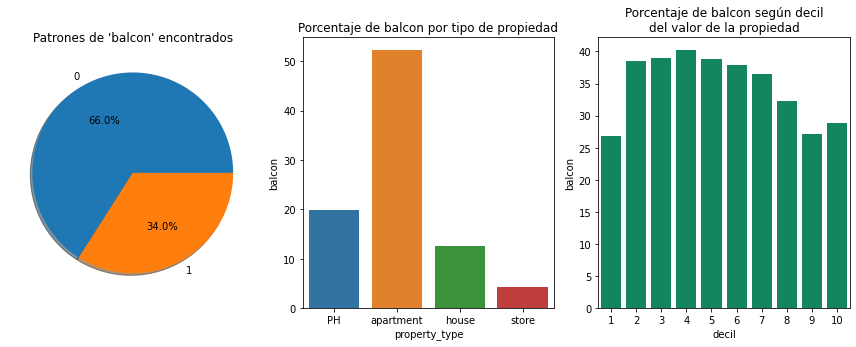

In [543]:
#Pattern
regexBalcon = re.compile("(?P<balcon>balcon|balcón|balcones)")

data['balcon'] = 0
#Regex en la columna 'descripcion'
MatchsBalcon = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBalcon.search(x))
maskBalcon_Match = MatchsBalcon.notnull()
data.loc[maskBalcon_Match, 'balcon'] = 1

#Regex en la columna 'title'
MatchsBalcon = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBalcon.search(x))
maskBalcon_Match = MatchsBalcon.notnull()
data.loc[maskBalcon_Match, 'balcon'] = 1

chart_type('balcon')

---
<b><a id=''> A estrenar</a>  </b>

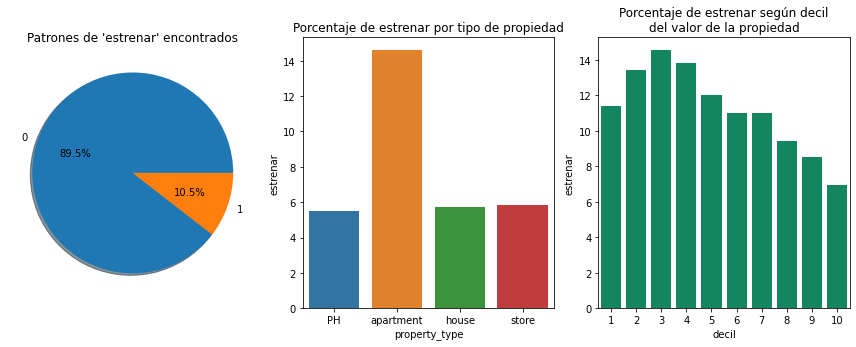

In [544]:
#Pattern
regexEstrenar = re.compile("(?P<Estrenar>(a estrenar)|(departamento nuevo))")

data['estrenar'] = 0
#Regex en la columna 'descripcion'
MatchsEstrenar = data['description_lower'].apply(lambda x: x if x is np.NaN else regexEstrenar.search(x))
maskEstrenar_Match = MatchsEstrenar.notnull()
data.loc[maskEstrenar_Match, 'estrenar'] = 1

#Regex en la columna 'title'
MatchsEstrenar = data['title_lower'].apply(lambda x: x if x is np.NaN else regexEstrenar.search(x))
maskEstrenar_Match = MatchsEstrenar.notnull()
data.loc[maskEstrenar_Match, 'estrenar'] = 1

chart_type('estrenar')

---
<b><a id=''> Calefacción central / Losa radiante</a>  </b>

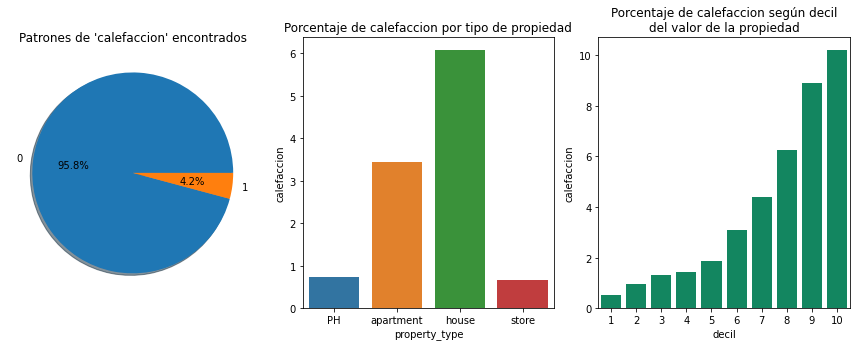

In [545]:
#Pattern
regexCalefaccion = re.compile("(?P<Calefaccion>(calefacciÃ³n por radiador)|(calefacciÃ³n central)|(calefaccion central)| \
(calefacción central)|(calefacciÃ³n por radiadores)|(calefaccion por losa radiante)|(calefacción por losa radiante))")

data['calefaccion'] = 0
#Regex en la columna 'descripcion'
MatchsCalefaccion = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCalefaccion.search(x))
maskCalefaccion_Match = MatchsCalefaccion.notnull()
data.loc[maskCalefaccion_Match, 'calefaccion'] = 1

#Regex en la columna 'title'
MatchsCalefaccion = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCalefaccion.search(x))
maskCalefaccion_Match = MatchsCalefaccion.notnull()
data.loc[maskCalefaccion_Match, 'calefaccion'] = 1

chart_type('calefaccion')

---
<b><a id='section_3_12'>3.12. Parque, Patio, Jardin</a>  </b>

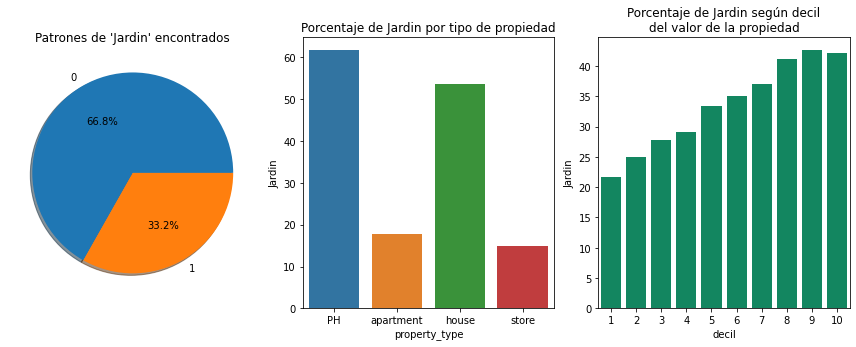

In [546]:
#Pattern
regexJardin = re.compile("(?P<parque>con parque|al parque|jard[i|í]n|patio)+")

data['Jardin'] = 0
#Regex en la columna 'descripcion'
MatchsJardin = data['description_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

#Regex en la columna 'title'
MatchsJardin = data['title_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

chart_type('Jardin')

---
---
<b><a id='section_4'><h4>4. Dataset final</h4></a></b>

Se construye un dataset con las variables que serán utilizadas en el modelo

In [547]:
data_final = data[['property_type','provincia','ciudad','departamento','barrio',
                   'price_aprox_usd_clean','surface_total_in_m2_clean','price_usd_per_m2_clean','rooms_clean',
                  'pileta','cochera','BarrioCerrado', 'Jacuzzi','Terraza','Quincho','Gimnasio', 'Seguridad', 'Reciclar', 'cantcocheras', 'banos', 'balcon', 'estrenar', 'calefaccion', 'Jardin',]]

Se conserva únicamente las observaciones donde el <u>precio por metro cuadrado no es nulo</u>, ya que esta será la variable a estimar en el modelo

In [548]:
mask = data['price_usd_per_m2_clean'].notnull()
data_final = data_final.loc[mask,:]

In [549]:
data_describe_final = pd.DataFrame(round(data_final.isnull().sum() /data_final.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe_final['type'] = data_final.dtypes
data_describe_final = data_describe_final[['type','Porcentaje de nulos']]
values= []
example=[]
for x in data_final:
    values.append(len(data_final[x].unique()))
    example.append(data_final[x].unique())
data_describe_final['Valores distintos'] = values
data_describe_final['Ejemplos'] = example

print("El dataset que se utilizará para realizar el modelo tiene",data_final.shape[0]," observaciones.")
data_describe_final

El dataset que se utilizará para realizar el modelo tiene 69147  observaciones.


,type,Porcentaje de nulos,Valores distintos,Ejemplos
property_type,object,0.00,4,"[house, apartment, PH, store]"
provincia,object,0.00,28,"[Bs.As. G.B.A. Zona Norte, Santa Fe, Bs.As. G...."
ciudad,object,0.03,409,"[Tigre, Pilar, Funes, La Plata, Escobar, Pinam..."
departamento,object,0.63,516,"[None, Tigre, Villa Rosa, Village Golf & Tenni..."
barrio,object,0.99,17,"[None, Barrio Los Lagos, Barrio Los Alisos, Ba..."
price_aprox_usd_clean,float64,0.00,6268,"[437000.0, 467000.0, 345000.0, 325000.0, 40000..."
surface_total_in_m2_clean,float64,0.00,1663,"[296.53925503980093, 318.2372493110059, 303.77..."
price_usd_per_m2_clean,float64,0.00,4030,"[1474.0, 1467.0, 1136.0, 464.0, 1006.0, 1074.0..."
rooms_clean,float64,0.11,8,"[3.0, nan, 2.0, 4.0, 5.0, 1.0, 7.0, 6.0]"
pileta,int64,0.00,2,"[1, 0]"


In [550]:
data_final.to_csv("../data")


In [551]:
data_final = pd.get_dummies(data = data_final, columns = ["ciudad", "property_type"], drop_first = True)



In [552]:
data_final.columns

data_final_model = data_final

In [553]:
data_final = data_final_model
data_final = data_final.drop(["barrio", "departamento", 'cantcocheras'], axis = 1)

data_final.dropna(inplace = True)
data_final["constant"] = 1

In [554]:
data_final.shape

(61281, 430)

In [555]:
data_features = data_final.drop(["price_aprox_usd_clean","price_usd_per_m2_clean","provincia"\
                                ], axis = 1)

target = data_final["price_usd_per_m2_clean"]



In [556]:
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import train_test_split



Xtrain , Xtest , ytrain , ytest = train_test_split(data_features,target)

Xtrain = sm.add_constant(Xtrain)
model_sm = sm.OLS(ytrain,Xtrain).fit()

In [557]:
model_sm.summary()

/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     price_usd_per_m2_clean   R-squared:                       0.670
Model:                                OLS   Adj. R-squared:                  0.668
Method:                     Least Squares   F-statistic:                     256.0
Date:                    Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                            17:31:12   Log-Likelihood:            -3.4730e+05
No. Observations:                   45960   AIC:                         6.953e+05
Df Residuals:                       45597   BIC:                         6.985e+05
Df Model:                             362                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
surface_total_in_m2_clean                     -1.9362      0.024    -82.233      0.000      -1.982      -1.890
rooms_clean                                   -4.9881      2.787     -1.790      0.074     -10.451       0.475
pileta                                       187.2477      6.250     29.960      0.000     174.998     199.497
cochera                                       79.1672      4.767     16.606      0.000      69.823      88.511
BarrioCerrado                                -43.4849     14.662     -2.966      0.003     -72.222     -14.747
Jacuzzi                                      202.9490     14.552     13.946      0.000     174.427     231.471
Terraza                                      -31.7847      5.367     -5.922      0.000     -42.304     -21.265
Quincho                                       14.7650      6.819      2.165      0.030       1.400      28.130
Gimnasio                                     120.9474     10.118     11.954      0.000     101.116     140.779
Seguridad                                     48.4847      7.710      6.289      0.000      33.374      63.596
Reciclar                                    -219.0477     13.683    -16.009      0.000    -245.866    -192.230
banos                                         23.4788      5.713      4.110      0.000      12.281      34.676
balcon                                        62.2204      5.136     12.115      0.000      52.154      72.286
estrenar                                      60.8187      6.807      8.935      0.000      47.477      74.160
calefaccion                                  131.9086     11.501     11.469      0.000     109.366     154.451
Jardin                                      -104.0417      5.260    -19.781      0.000    -114.351     -93.733
ciudad_Achiras                             -2.131e-10   2.11e-10     -1.008      0.313   -6.27e-10    2.01e-10
ciudad_Agronomía                             295.0336    110.333      2.674      0.007      78.779     511.289
ciudad_Agua Blanca                          -457.6305    465.006     -0.984      0.325   -1369.050     453.789
ciudad_Agua de Oro                          -462.0556    465.249     -0.993      0.321   -1373.951     449.840
ciudad_Aguas Verdes                         -747.5074    465.034     -1.607      0.108   -1658.981     163.966
ciudad_Aldea Brasilera                      1.144e-11   1.26e-10      0.091      0.928   -2.36e-10    2.59e-10
ciudad_Almafuerte                          -3.084e-10   2.05e-10     -1.507      0.132    -7.1e-10    9.28e-11
ciudad_Almagro                               452.4594     23.592     19.178      0.000     406.218     498.701
ciudad_Almirante Brown                    

In [558]:
#from sm import cvxopt
model_reg_lasso = sm.OLS(ytrain,Xtrain).fit_regularized(method='elastic_net', alpha=0.1, L1_wt = 1)

In [559]:
#model_reg_lasso.score

In [560]:
prediction_sm = model_sm.predict(Xtest)
prediction_lasso = model_reg_lasso.predict(Xtest)



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print ('R2 Statmodels OLS:', r2_score(ytest, prediction_sm).round(2))
print ('R2 Statmodels Lasso:', r2_score(ytest, prediction_lasso).round(2))





R2 Statmodels OLS: 0.67
R2 Statmodels Lasso: 0.65


In [561]:
model_skl_LassoCV = linear_model.LassoCV(alphas=np.linspace(0.001,1, 1000), cv=3, normalize=True)
model_skl_LassoCV.fit(Xtrain, ytrain)
predictions_lassoCV_skl = model_skl_LassoCV.predict(Xtest)



In [563]:

print ("R2 SkLearn LassoCV:", model_skl_LassoCV.score(Xtest, ytest))
print ("R2 SkLearn LassoCV:", r2_score(ytest, predictions_lassoCV_skl))
print ("alpha:", model_skl_LassoCV.alpha_)

#print ("Coef:", model_skl_LassoCV.coef_)
#print ((model_skl_LassoCV.coef_).shape)
#print((data_features.columns).shape)

betas = pd.DataFrame(data= model_skl_LassoCV.coef_ , index=data_features.columns, columns=['Betas'])
pd.set_option('display.max_rows', 600)
betas


R2 SkLearn LassoCV: 0.6717254335369128
R2 SkLearn LassoCV: 0.6717254335369128
alpha: 0.002


,Betas
surface_total_in_m2_clean,-1.931631
rooms_clean,-4.539211
pileta,186.939815
cochera,77.887381
BarrioCerrado,-41.122172
Jacuzzi,201.790804
Terraza,-29.310596
Quincho,13.536898
Gimnasio,121.042552
Seguridad,47.992259


In [564]:
betas_0_mask = betas.Betas == 0
betas.loc[betas_0_mask,:]

,Betas
ciudad_Achiras,0.0
ciudad_Aldea Brasilera,0.0
ciudad_Almafuerte,0.0
ciudad_Alvear,0.0
ciudad_Apóstoles,0.0
ciudad_Ascochinga,0.0
ciudad_Baradero,0.0
ciudad_Bella Vista,0.0
ciudad_Calmayo,0.0
ciudad_Campo Grande,0.0
